# **MLP model for HMEQ Dataset**

In [1]:
from src import utilities
from src import evaluation
from src import tensorflow

hmeq_dataset_path = '../../../datasets/preprocessed/hmeq/'

2023-03-10 17:01:33.032353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 17:01:33.630824: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-10 17:01:33.630885: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-10 17:01:33.630890: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Model save_path: ../../../models/MLP/2023-03-10_17-01-34


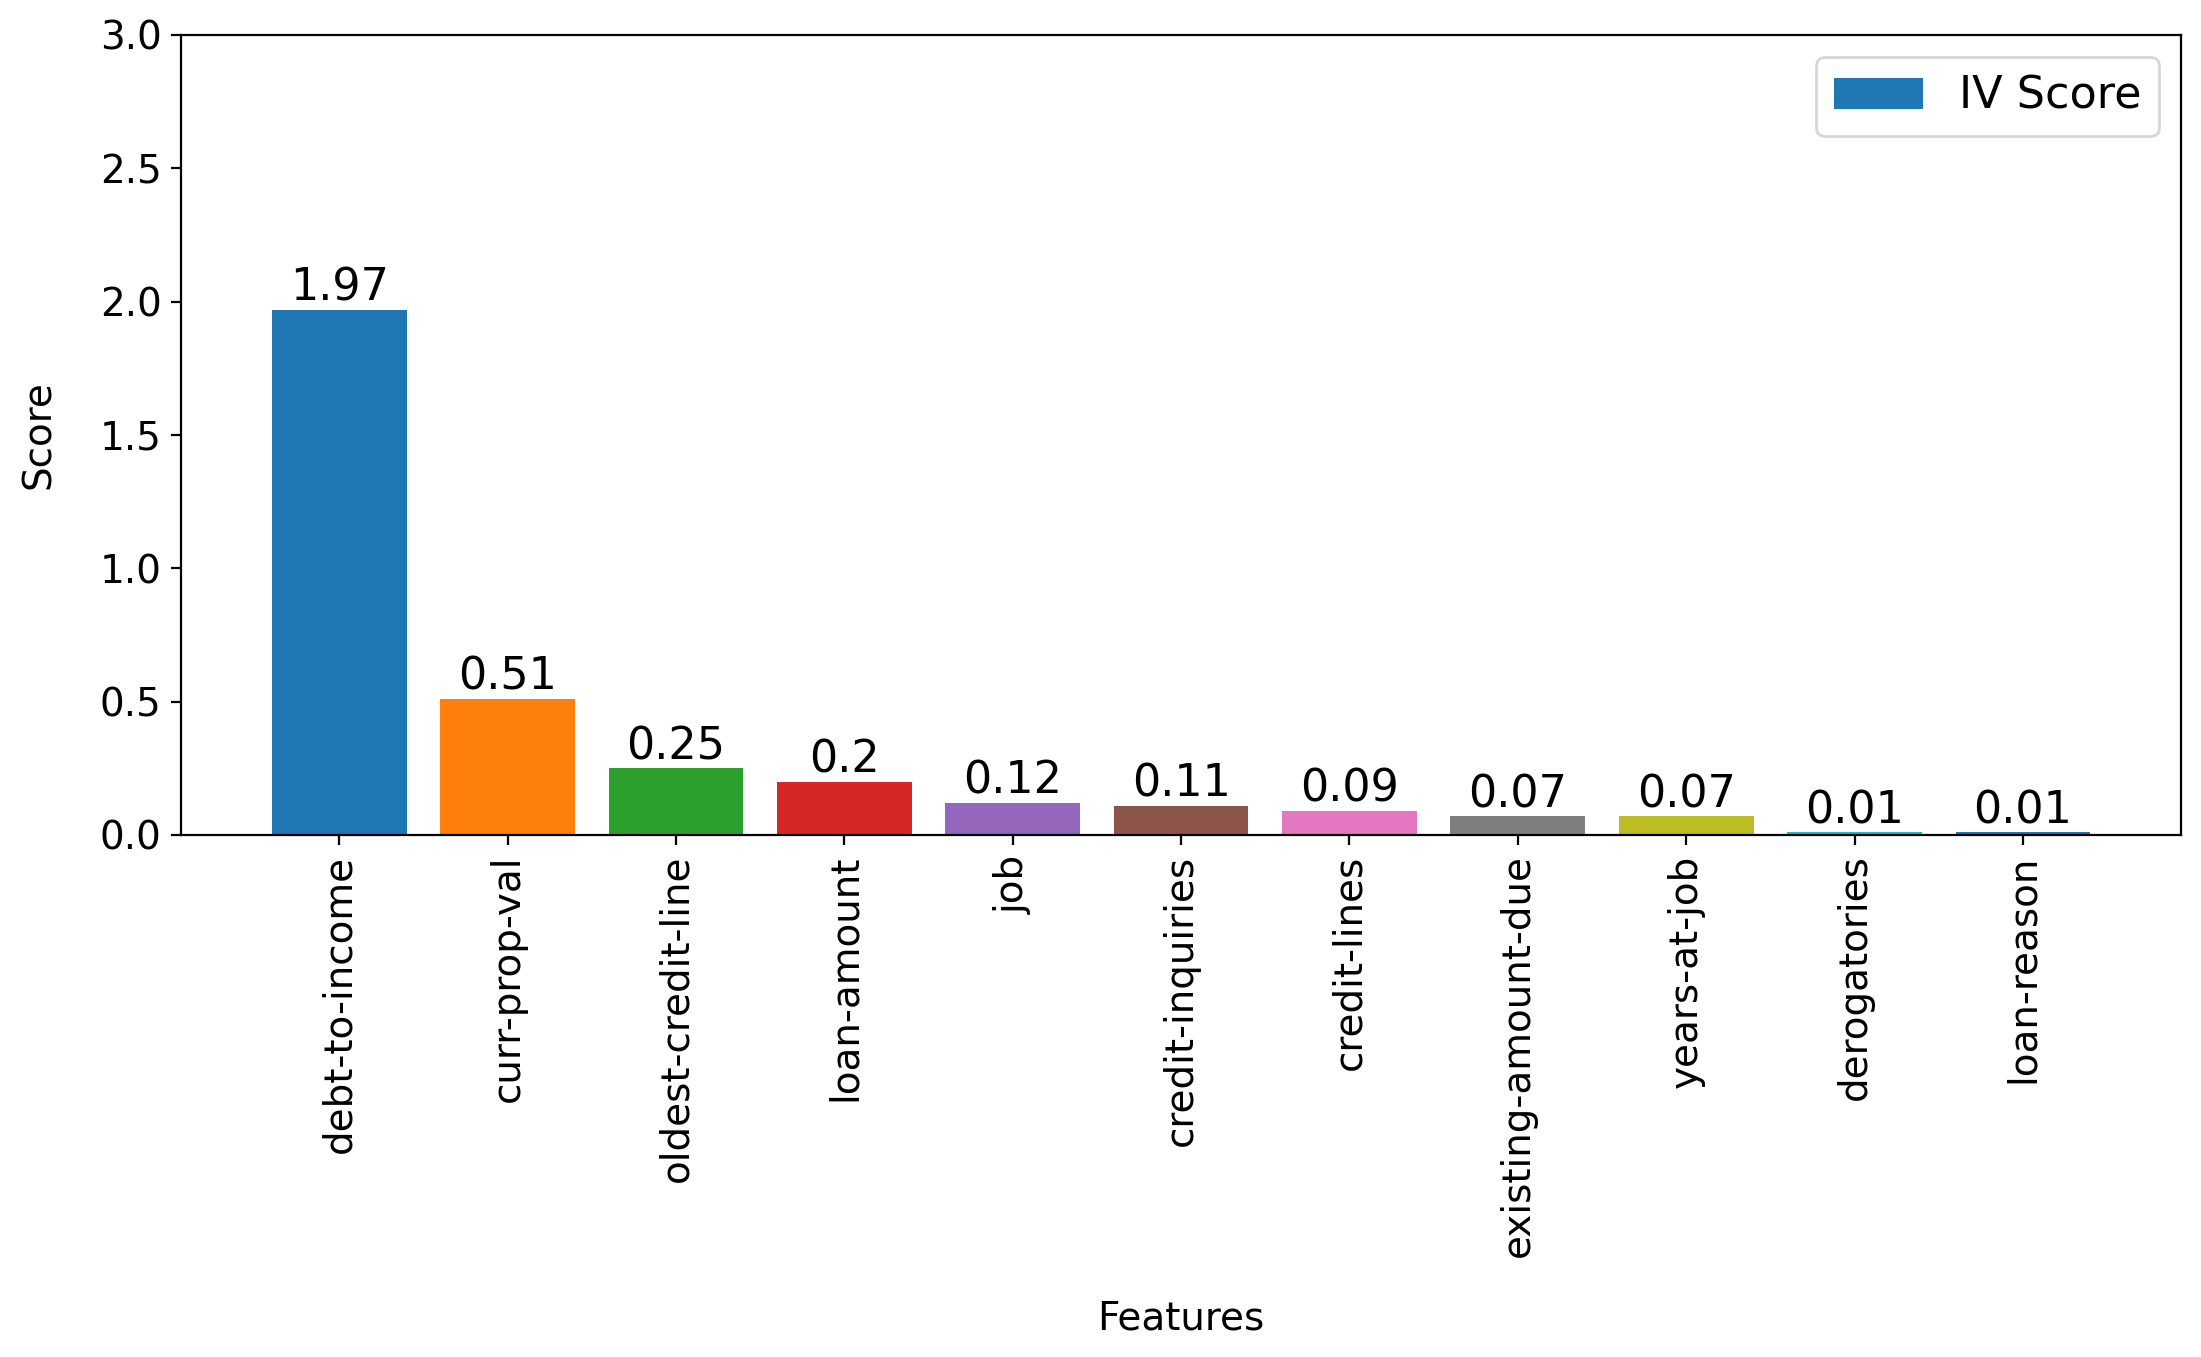

Selected Features: ['debt-to-income', 'curr-prop-val', 'oldest-credit-line', 'loan-amount', 'job', 'credit-inquiries', 'credit-lines', 'existing-amount-due', 'years-at-job', 'derogatories', 'loan-reason']


0it [00:00, ?it/s]

# **FOLD 1**

Model: "MLP-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

2023-03-10 17:01:34.498776: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 17:01:34.499080: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-10 17:01:34.512862: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-10 17:01:34.512920: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu f

Epoch 1/10
133/135 [============================>.] - ETA: 0s - loss: 0.0506 - accuracy: 0.8311
Epoch 1: val_loss improved from inf to 0.04738, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


135/135 [==============================] - 3s 16ms/step - loss: 0.0506 - accuracy: 0.8308 - val_loss: 0.0474 - val_accuracy: 0.8176 - lr: 1.0000e-04
Epoch 2/10
134/135 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.8358
Epoch 2: val_loss improved from 0.04738 to 0.04714, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0438 - accuracy: 0.8359 - val_loss: 0.0471 - val_accuracy: 0.8260 - lr: 1.0000e-04
Epoch 3/10
134/135 [============================>.] - ETA: 0s - loss: 0.0425 - accuracy: 0.8382
Epoch 3: val_loss improved from 0.04714 to 0.04684, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0425 - accuracy: 0.8383 - val_loss: 0.0468 - val_accuracy: 0.8344 - lr: 1.0000e-04
Epoch 4/10
132/135 [============================>.] - ETA: 0s - loss: 0.0421 - accuracy: 0.8433
Epoch 4: val_loss did not improve from 0.04684
135/135 [==============================] - 1s 9ms/step - loss: 0.0421 - accuracy: 0.8429 - val_loss: 0.0469 - val_accuracy: 0.8365 - lr: 1.0000e-04
Epoch 5/10
132/135 [============================>.] - ETA: 0s - loss: 0.0415 - accuracy: 0.8475
Epoch 5: val_loss improved from 0.04684 to 0.04494, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


135/135 [==============================] - 2s 14ms/step - loss: 0.0414 - accuracy: 0.8481 - val_loss: 0.0449 - val_accuracy: 0.8239 - lr: 1.0000e-04
Epoch 6/10
134/135 [============================>.] - ETA: 0s - loss: 0.0410 - accuracy: 0.8498
Epoch 6: val_loss did not improve from 0.04494
135/135 [==============================] - 1s 10ms/step - loss: 0.0410 - accuracy: 0.8497 - val_loss: 0.0475 - val_accuracy: 0.7736 - lr: 1.0000e-04
Epoch 7/10
131/135 [============================>.] - ETA: 0s - loss: 0.0409 - accuracy: 0.8514
Epoch 7: val_loss improved from 0.04494 to 0.04489, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0407 - accuracy: 0.8513 - val_loss: 0.0449 - val_accuracy: 0.8260 - lr: 1.0000e-04
Epoch 8/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0404 - accuracy: 0.8575
Epoch 8: val_loss improved from 0.04489 to 0.04484, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0402 - accuracy: 0.8578 - val_loss: 0.0448 - val_accuracy: 0.8365 - lr: 1.0000e-04
Epoch 9/10
132/135 [============================>.] - ETA: 0s - loss: 0.0399 - accuracy: 0.8615
Epoch 9: val_loss improved from 0.04484 to 0.04374, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-1/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0400 - accuracy: 0.8609 - val_loss: 0.0437 - val_accuracy: 0.8512 - lr: 1.0000e-04
Epoch 10/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0394 - accuracy: 0.8639
Epoch 10: val_loss did not improve from 0.04374
135/135 [==============================] - 1s 10ms/step - loss: 0.0395 - accuracy: 0.8634 - val_loss: 0.0475 - val_accuracy: 0.8679 - lr: 1.0000e-04


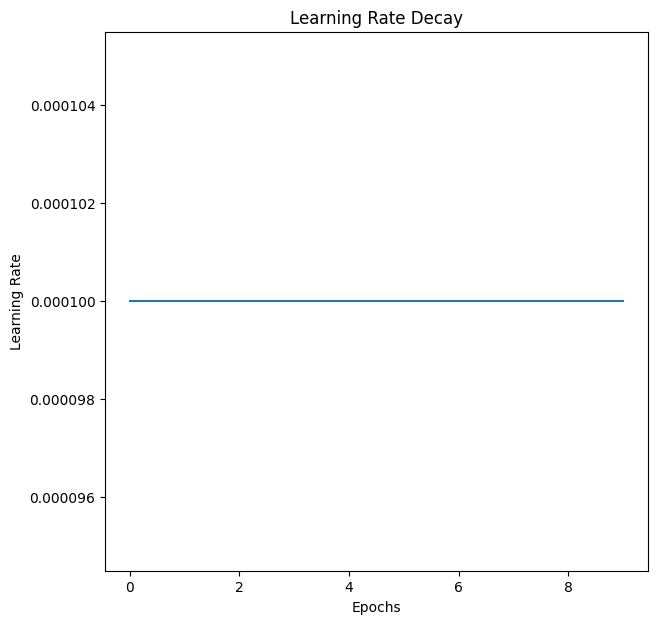

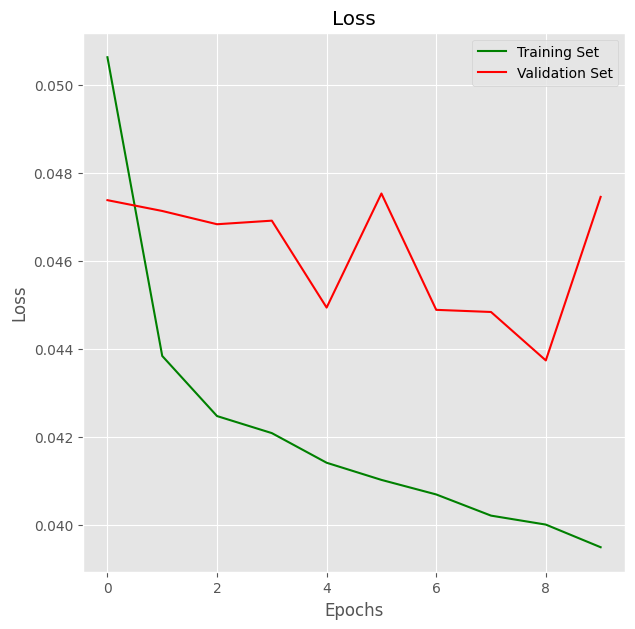

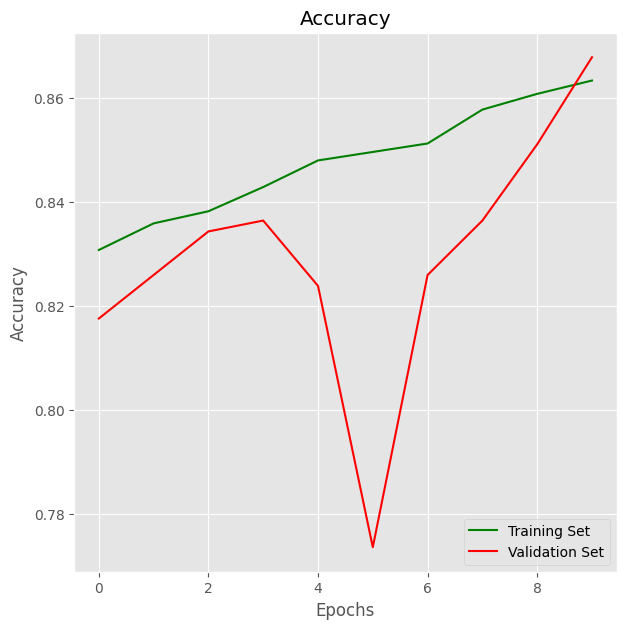

Average loss on train set: 0.04218886084854603
Average accuracy on train set: 0.8479142248630523
Average loss on test set: 0.046167940646409986
Average accuracy on test set: 0.8293501079082489
38/38 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.8591
Test Loss: 0.040679626166820526
Test Accuracy: 0.8590604066848755
  1/135 [..............................] - ETA: 6s

2023-03-10 17:01:52.210176: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-1: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-1; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
1it [00:18, 18.61s/it]

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3435
           1       0.68      0.71      0.69       856

    accuracy                           0.88      4291
   macro avg       0.80      0.81      0.81      4291
weighted avg       0.88      0.88      0.88      4291

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       382
           1       0.62      0.64      0.63        95

    accuracy                           0.85       477
   macro avg       0.77      0.77      0.77       477
weighted avg       0.85      0.85      0.85       477


-------- TERMINATED FOLD: 1 --------


# **FOLD 2**

Model: "MLP-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


135/135 [==============================] - 2s 14ms/step - loss: 0.0512 - accuracy: 0.8250 - val_loss: 0.0439 - val_accuracy: 0.8386 - lr: 1.0000e-04
Epoch 2/10
131/135 [============================>.] - ETA: 0s - loss: 0.0446 - accuracy: 0.8311
Epoch 2: val_loss improved from 0.04389 to 0.04075, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0445 - accuracy: 0.8313 - val_loss: 0.0408 - val_accuracy: 0.8428 - lr: 1.0000e-04
Epoch 3/10
131/135 [============================>.] - ETA: 0s - loss: 0.0430 - accuracy: 0.8354
Epoch 3: val_loss did not improve from 0.04075
135/135 [==============================] - 1s 10ms/step - loss: 0.0432 - accuracy: 0.8343 - val_loss: 0.0409 - val_accuracy: 0.8365 - lr: 1.0000e-04
Epoch 4/10
131/135 [============================>.] - ETA: 0s - loss: 0.0427 - accuracy: 0.8402
Epoch 4: val_loss improved from 0.04075 to 0.04069, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0424 - accuracy: 0.8411 - val_loss: 0.0407 - val_accuracy: 0.8616 - lr: 1.0000e-04
Epoch 5/10
132/135 [============================>.] - ETA: 0s - loss: 0.0419 - accuracy: 0.8445
Epoch 5: val_loss improved from 0.04069 to 0.04021, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0419 - accuracy: 0.8450 - val_loss: 0.0402 - val_accuracy: 0.8658 - lr: 1.0000e-04
Epoch 6/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0414 - accuracy: 0.8512
Epoch 6: val_loss did not improve from 0.04021
135/135 [==============================] - 1s 10ms/step - loss: 0.0414 - accuracy: 0.8499 - val_loss: 0.0407 - val_accuracy: 0.8763 - lr: 1.0000e-04
Epoch 7/10
134/135 [============================>.] - ETA: 0s - loss: 0.0411 - accuracy: 0.8547
Epoch 7: val_loss improved from 0.04021 to 0.03903, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-2/assets


135/135 [==============================] - 2s 14ms/step - loss: 0.0411 - accuracy: 0.8548 - val_loss: 0.0390 - val_accuracy: 0.8574 - lr: 1.0000e-04
Epoch 8/10
133/135 [============================>.] - ETA: 0s - loss: 0.0406 - accuracy: 0.8576
Epoch 8: val_loss did not improve from 0.03903
135/135 [==============================] - 1s 10ms/step - loss: 0.0407 - accuracy: 0.8564 - val_loss: 0.0425 - val_accuracy: 0.8092 - lr: 1.0000e-04
Epoch 9/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0401 - accuracy: 0.8618
Epoch 9: val_loss did not improve from 0.03903
135/135 [==============================] - 1s 10ms/step - loss: 0.0404 - accuracy: 0.8602 - val_loss: 0.0394 - val_accuracy: 0.8365 - lr: 1.0000e-04
Epoch 10/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0397 - accuracy: 0.8661
Epoch 10: val_loss did not improve from 0.03903
135/135 [==============================] - 1s 10ms/step - loss: 0.0398 - accuracy: 0.8648 - val_loss: 0.0396 - val_accurac

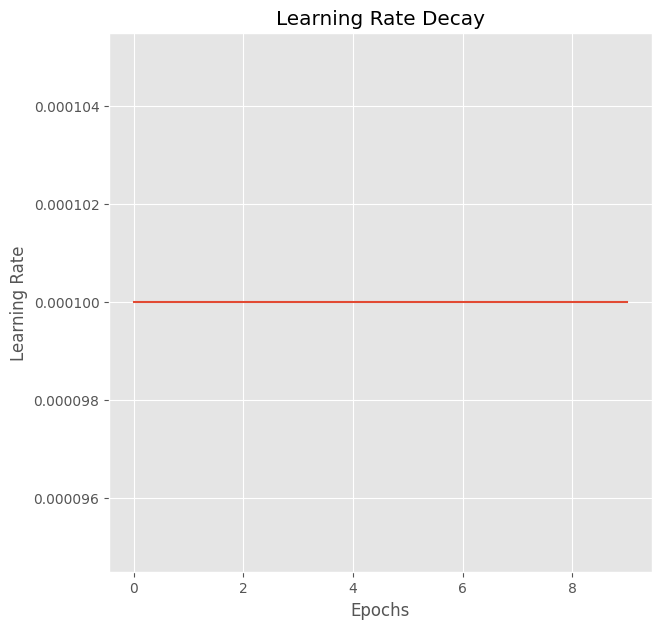

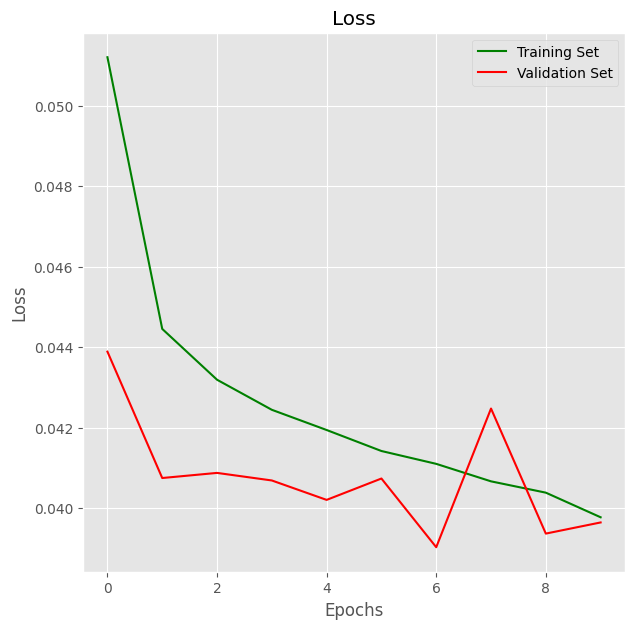

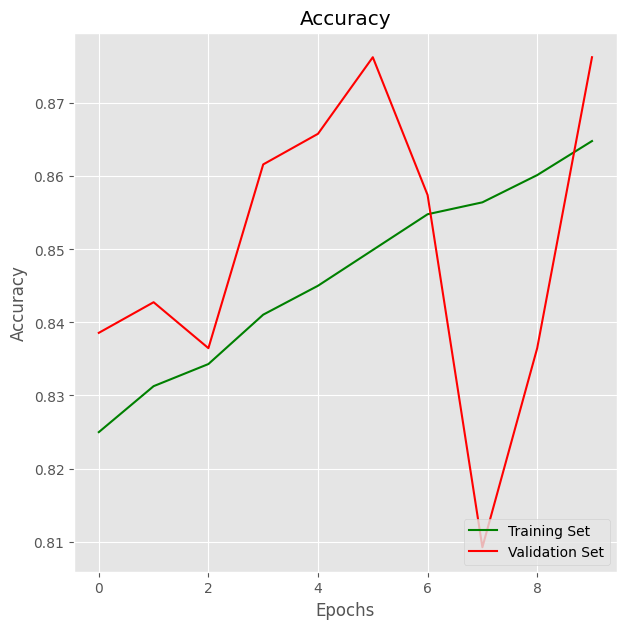

Average loss on train set: 0.042659162729978564
Average accuracy on train set: 0.8462829053401947
Average loss on test set: 0.040768235176801684
Average accuracy on test set: 0.850104820728302
38/38 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.8490
Test Loss: 0.040957387536764145
Test Accuracy: 0.8489933013916016
  1/135 [..............................] - ETA: 5s

2023-03-10 17:02:09.570851: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-2: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-2; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
2it [00:35, 17.85s/it]

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3435
           1       0.62      0.76      0.68       856

    accuracy                           0.86      4291
   macro avg       0.78      0.82      0.80      4291
weighted avg       0.87      0.86      0.86      4291

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       382
           1       0.61      0.78      0.69        95

    accuracy                           0.86       477
   macro avg       0.78      0.83      0.80       477
weighted avg       0.88      0.86      0.86       477


-------- TERMINATED FOLD: 2 --------


# **FOLD 3**

Model: "MLP-3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0504 - accuracy: 0.8264 - val_loss: 0.0489 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 2/10
133/135 [============================>.] - ETA: 0s - loss: 0.0436 - accuracy: 0.8374
Epoch 2: val_loss improved from 0.04885 to 0.04836, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-3


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0437 - accuracy: 0.8373 - val_loss: 0.0484 - val_accuracy: 0.7841 - lr: 1.0000e-04
Epoch 3/10
132/135 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.8416
Epoch 3: val_loss improved from 0.04836 to 0.04762, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-3


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


135/135 [==============================] - 2s 12ms/step - loss: 0.0425 - accuracy: 0.8408 - val_loss: 0.0476 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 4/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0418 - accuracy: 0.8454
Epoch 4: val_loss did not improve from 0.04762
135/135 [==============================] - 1s 10ms/step - loss: 0.0416 - accuracy: 0.8464 - val_loss: 0.0510 - val_accuracy: 0.8323 - lr: 1.0000e-04
Epoch 5/10
135/135 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.8532
Epoch 5: val_loss improved from 0.04762 to 0.04731, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-3


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0413 - accuracy: 0.8532 - val_loss: 0.0473 - val_accuracy: 0.7945 - lr: 1.0000e-04
Epoch 6/10
133/135 [============================>.] - ETA: 0s - loss: 0.0406 - accuracy: 0.8581
Epoch 6: val_loss improved from 0.04731 to 0.04726, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-3


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


135/135 [==============================] - 2s 14ms/step - loss: 0.0406 - accuracy: 0.8574 - val_loss: 0.0473 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 7/10
133/135 [============================>.] - ETA: 0s - loss: 0.0403 - accuracy: 0.8569
Epoch 7: val_loss did not improve from 0.04726
135/135 [==============================] - 1s 10ms/step - loss: 0.0403 - accuracy: 0.8569 - val_loss: 0.0475 - val_accuracy: 0.7883 - lr: 1.0000e-04
Epoch 8/10
131/135 [============================>.] - ETA: 0s - loss: 0.0397 - accuracy: 0.8612
Epoch 8: val_loss did not improve from 0.04726
135/135 [==============================] - 1s 10ms/step - loss: 0.0399 - accuracy: 0.8613 - val_loss: 0.0483 - val_accuracy: 0.7799 - lr: 1.0000e-04
Epoch 9/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0396 - accuracy: 0.8601
Epoch 9: val_loss improved from 0.04726 to 0.04705, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-3


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


135/135 [==============================] - 2s 14ms/step - loss: 0.0395 - accuracy: 0.8611 - val_loss: 0.0470 - val_accuracy: 0.8197 - lr: 1.0000e-04
Epoch 10/10
132/135 [============================>.] - ETA: 0s - loss: 0.0392 - accuracy: 0.8651
Epoch 10: val_loss improved from 0.04705 to 0.04702, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-3


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-3/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0393 - accuracy: 0.8648 - val_loss: 0.0470 - val_accuracy: 0.8407 - lr: 1.0000e-04


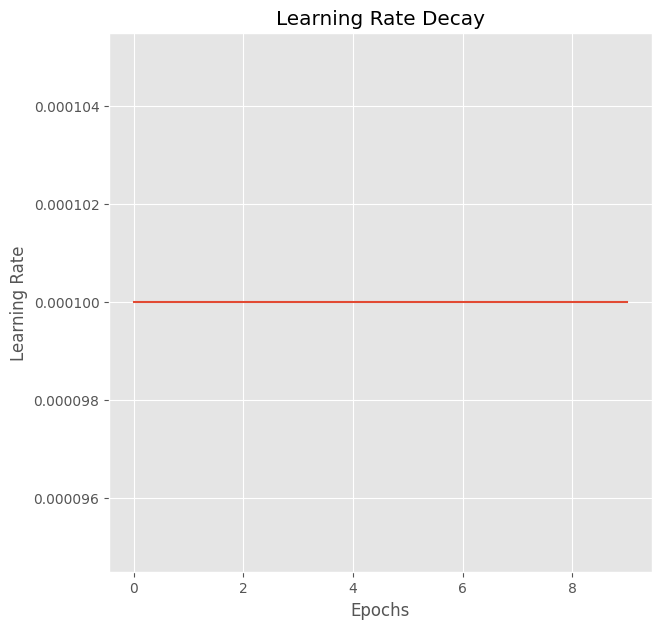

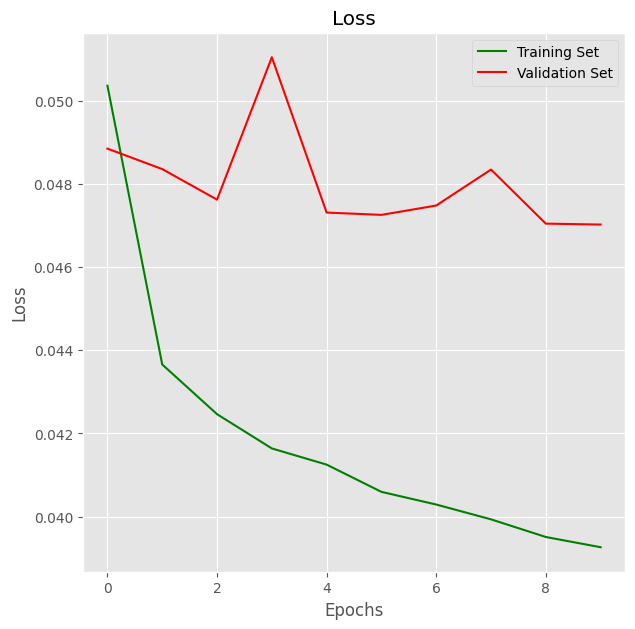

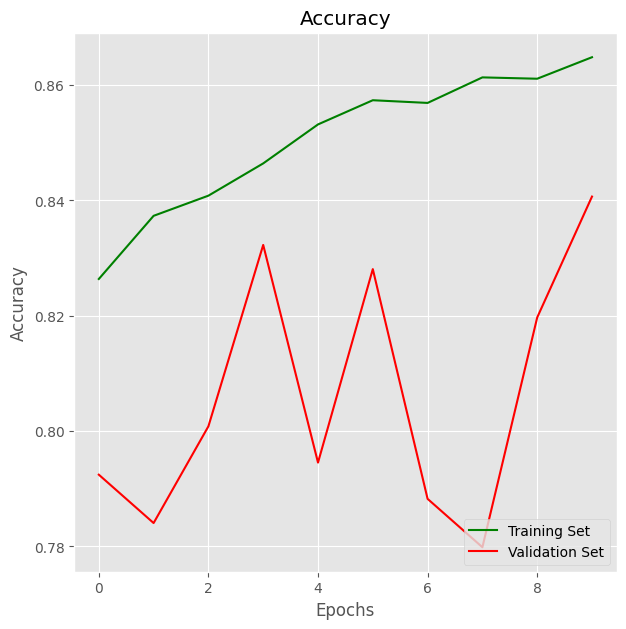

Average loss on train set: 0.04189717881381512
Average accuracy on train set: 0.8505709648132325
Average loss on test set: 0.048035145923495295
Average accuracy on test set: 0.8060796678066253
38/38 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.8607
Test Loss: 0.04131864011287689
Test Accuracy: 0.8607382774353027
  1/135 [..............................] - ETA: 5s

2023-03-10 17:02:27.620323: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-3: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-3; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
3it [00:53, 17.94s/it]

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3435
           1       0.70      0.69      0.70       856

    accuracy                           0.88      4291
   macro avg       0.81      0.81      0.81      4291
weighted avg       0.88      0.88      0.88      4291

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       382
           1       0.60      0.61      0.60        95

    accuracy                           0.84       477
   macro avg       0.75      0.75      0.75       477
weighted avg       0.84      0.84      0.84       477


-------- TERMINATED FOLD: 3 --------


# **FOLD 4**

Model: "MLP-4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-4/assets


135/135 [==============================] - 2s 14ms/step - loss: 0.0510 - accuracy: 0.8254 - val_loss: 0.0446 - val_accuracy: 0.8365 - lr: 1.0000e-04
Epoch 2/10
132/135 [============================>.] - ETA: 0s - loss: 0.0445 - accuracy: 0.8333
Epoch 2: val_loss improved from 0.04460 to 0.04351, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-4


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-4/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0444 - accuracy: 0.8343 - val_loss: 0.0435 - val_accuracy: 0.8365 - lr: 1.0000e-04
Epoch 3/10
135/135 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.8369
Epoch 3: val_loss improved from 0.04351 to 0.04249, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-4


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-4/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0430 - accuracy: 0.8369 - val_loss: 0.0425 - val_accuracy: 0.8260 - lr: 1.0000e-04
Epoch 4/10
135/135 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.8427
Epoch 4: val_loss did not improve from 0.04249
135/135 [==============================] - 1s 10ms/step - loss: 0.0421 - accuracy: 0.8427 - val_loss: 0.0430 - val_accuracy: 0.8323 - lr: 1.0000e-04
Epoch 5/10
131/135 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.8502
Epoch 5: val_loss did not improve from 0.04249
135/135 [==============================] - 1s 9ms/step - loss: 0.0416 - accuracy: 0.8481 - val_loss: 0.0477 - val_accuracy: 0.7883 - lr: 1.0000e-04
Epoch 6/10
133/135 [============================>.] - ETA: 0s - loss: 0.0411 - accuracy: 0.8520
Epoch 6: val_loss did not improve from 0.04249
135/135 [==============================] - 1s 10ms/step - loss: 0.0411 - accuracy: 0.8518 - val_loss: 0.0484 - val_accuracy: 

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-4/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0407 - accuracy: 0.8567 - val_loss: 0.0424 - val_accuracy: 0.8239 - lr: 1.0000e-04
Epoch 8/10
132/135 [============================>.] - ETA: 0s - loss: 0.0404 - accuracy: 0.8554
Epoch 8: val_loss did not improve from 0.04241
135/135 [==============================] - 1s 10ms/step - loss: 0.0403 - accuracy: 0.8557 - val_loss: 0.0429 - val_accuracy: 0.8658 - lr: 1.0000e-04
Epoch 9/10
134/135 [============================>.] - ETA: 0s - loss: 0.0400 - accuracy: 0.8640
Epoch 9: val_loss did not improve from 0.04241
135/135 [==============================] - 1s 10ms/step - loss: 0.0400 - accuracy: 0.8639 - val_loss: 0.0443 - val_accuracy: 0.8616 - lr: 1.0000e-04
Epoch 10/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0398 - accuracy: 0.8654
Epoch 10: val_loss did not improve from 0.04241
135/135 [==============================] - 1s 10ms/step - loss: 0.0396 - accuracy: 0.8660 - val_loss: 0.0443 - val_accurac

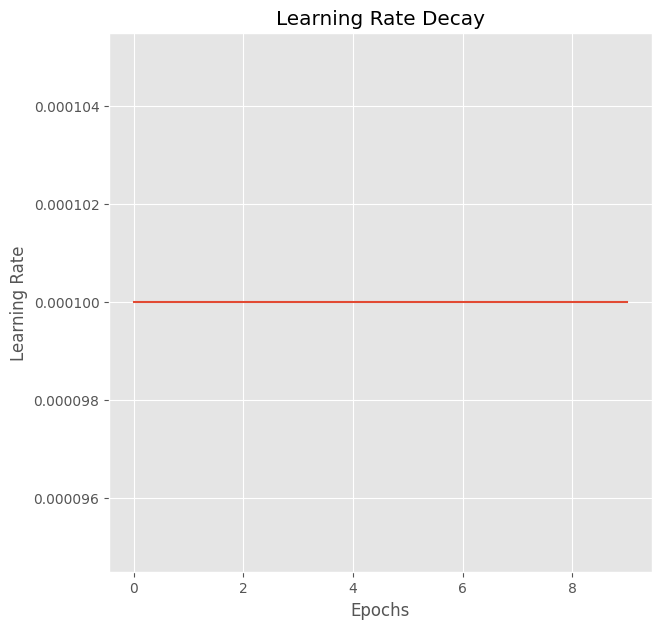

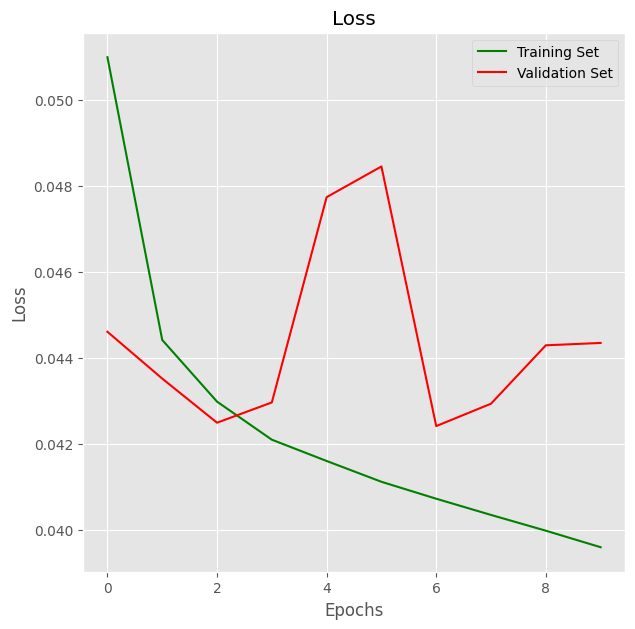

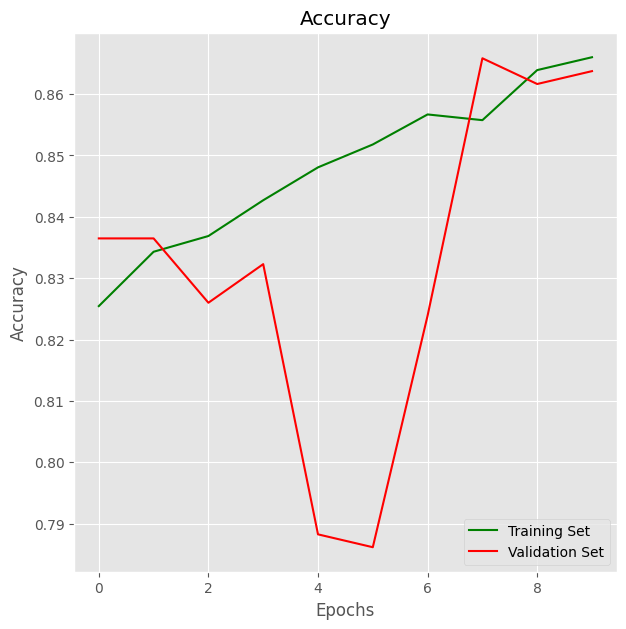

Average loss on train set: 0.042381132021546364
Average accuracy on train set: 0.8481472849845886
Average loss on test set: 0.04437161572277546
Average accuracy on test set: 0.8320754766464233
38/38 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.8406
Test Loss: 0.041155893355607986
Test Accuracy: 0.8406040072441101
  1/135 [..............................] - ETA: 5s

2023-03-10 17:02:44.391872: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-4: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-4; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
4it [01:10, 17.50s/it]

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      3435
           1       0.56      0.78      0.65       856

    accuracy                           0.84      4291
   macro avg       0.75      0.82      0.77      4291
weighted avg       0.86      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       382
           1       0.54      0.79      0.64        95

    accuracy                           0.82       477
   macro avg       0.74      0.81      0.76       477
weighted avg       0.86      0.82      0.84       477


-------- TERMINATED FOLD: 4 --------


# **FOLD 5**

Model: "MLP-5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-5/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0504 - accuracy: 0.8292 - val_loss: 0.0485 - val_accuracy: 0.8092 - lr: 1.0000e-04
Epoch 2/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0435 - accuracy: 0.8349
Epoch 2: val_loss did not improve from 0.04851
135/135 [==============================] - 1s 10ms/step - loss: 0.0434 - accuracy: 0.8352 - val_loss: 0.0489 - val_accuracy: 0.8071 - lr: 1.0000e-04
Epoch 3/10
133/135 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.8386
Epoch 3: val_loss did not improve from 0.04851
135/135 [==============================] - 1s 9ms/step - loss: 0.0422 - accuracy: 0.8394 - val_loss: 0.0486 - val_accuracy: 0.8134 - lr: 1.0000e-04
Epoch 4/10
131/135 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.8466
Epoch 4: val_loss did not improve from 0.04851
135/135 [==============================] - 1s 10ms/step - loss: 0.0417 - accuracy: 0.8446 - val_loss: 0.0584 - val_accuracy: 

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-5/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0408 - accuracy: 0.8483 - val_loss: 0.0475 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 7/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0400 - accuracy: 0.8594
Epoch 7: val_loss did not improve from 0.04751
135/135 [==============================] - 1s 10ms/step - loss: 0.0401 - accuracy: 0.8574 - val_loss: 0.0502 - val_accuracy: 0.7589 - lr: 1.0000e-04
Epoch 8/10
135/135 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.8588
Epoch 8: val_loss did not improve from 0.04751
135/135 [==============================] - 1s 10ms/step - loss: 0.0398 - accuracy: 0.8588 - val_loss: 0.0476 - val_accuracy: 0.8365 - lr: 1.0000e-04
Epoch 9/10
134/135 [============================>.] - ETA: 0s - loss: 0.0393 - accuracy: 0.8629
Epoch 9: val_loss did not improve from 0.04751
135/135 [==============================] - 1s 10ms/step - loss: 0.0393 - accuracy: 0.8627 - val_loss: 0.0478 - val_accuracy:

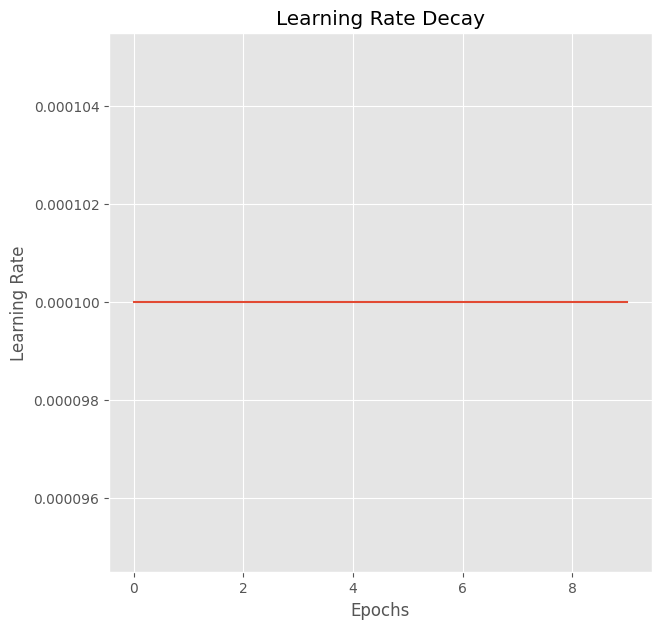

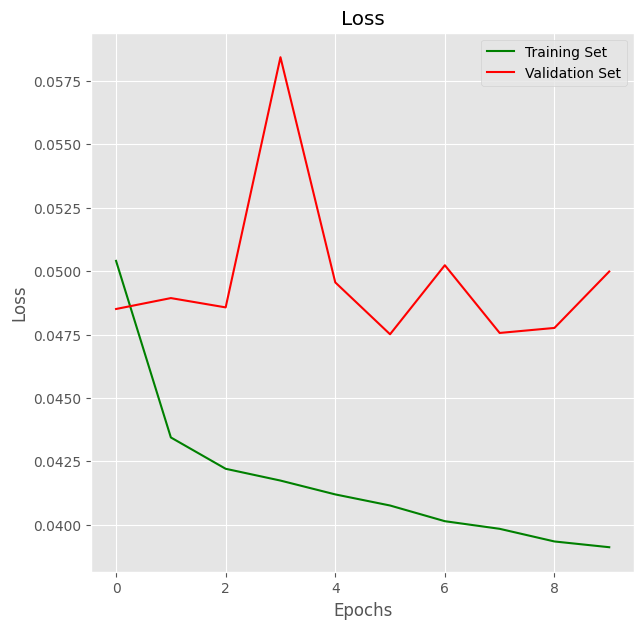

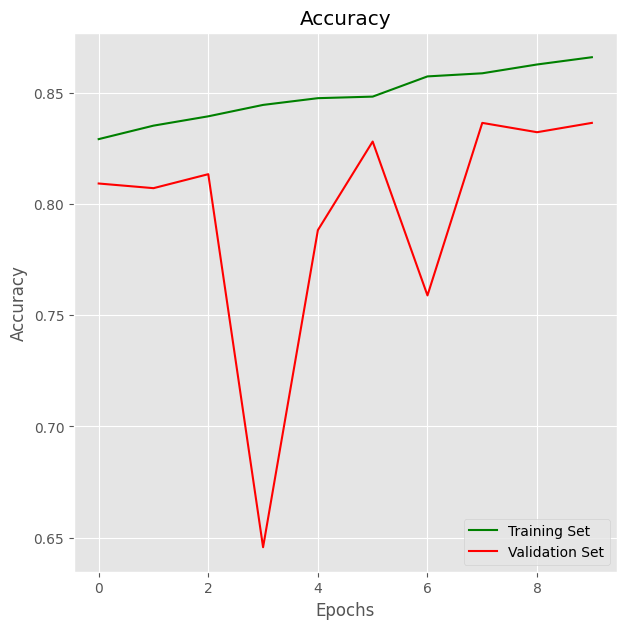

Average loss on train set: 0.04181860201060772
Average accuracy on train set: 0.8489163398742676
Average loss on test set: 0.049705938622355464
Average accuracy on test set: 0.7955974876880646
38/38 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.8523
Test Loss: 0.04161570966243744
Test Accuracy: 0.8523489832878113
  1/135 [..............................] - ETA: 5s

2023-03-10 17:03:00.162234: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-5: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-5; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
5it [01:26, 16.87s/it]

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3435
           1       0.64      0.73      0.68       856

    accuracy                           0.86      4291
   macro avg       0.79      0.81      0.80      4291
weighted avg       0.87      0.86      0.87      4291

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       382
           1       0.55      0.69      0.62        95

    accuracy                           0.83       477
   macro avg       0.74      0.78      0.75       477
weighted avg       0.85      0.83      0.83       477


-------- TERMINATED FOLD: 5 --------


# **FOLD 6**

Model: "MLP-6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0512 - accuracy: 0.8238 - val_loss: 0.0389 - val_accuracy: 0.8826 - lr: 1.0000e-04
Epoch 2/10
135/135 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.8275
Epoch 2: val_loss improved from 0.03893 to 0.03528, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-6


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0451 - accuracy: 0.8275 - val_loss: 0.0353 - val_accuracy: 0.8805 - lr: 1.0000e-04
Epoch 3/10
132/135 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.8295
Epoch 3: val_loss improved from 0.03528 to 0.03513, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-6


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0439 - accuracy: 0.8308 - val_loss: 0.0351 - val_accuracy: 0.8931 - lr: 1.0000e-04
Epoch 4/10
131/135 [============================>.] - ETA: 0s - loss: 0.0431 - accuracy: 0.8390
Epoch 4: val_loss improved from 0.03513 to 0.03337, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-6


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0430 - accuracy: 0.8394 - val_loss: 0.0334 - val_accuracy: 0.8889 - lr: 1.0000e-04
Epoch 5/10
132/135 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.8421
Epoch 5: val_loss improved from 0.03337 to 0.03334, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-6


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0426 - accuracy: 0.8429 - val_loss: 0.0333 - val_accuracy: 0.8994 - lr: 1.0000e-04
Epoch 6/10
133/135 [============================>.] - ETA: 0s - loss: 0.0421 - accuracy: 0.8466
Epoch 6: val_loss did not improve from 0.03334
135/135 [==============================] - 1s 9ms/step - loss: 0.0421 - accuracy: 0.8464 - val_loss: 0.0339 - val_accuracy: 0.9015 - lr: 1.0000e-04
Epoch 7/10
132/135 [============================>.] - ETA: 0s - loss: 0.0417 - accuracy: 0.8485
Epoch 7: val_loss improved from 0.03334 to 0.03322, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-6


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-6/assets


135/135 [==============================] - 2s 14ms/step - loss: 0.0416 - accuracy: 0.8490 - val_loss: 0.0332 - val_accuracy: 0.8994 - lr: 1.0000e-04
Epoch 8/10
133/135 [============================>.] - ETA: 0s - loss: 0.0411 - accuracy: 0.8550
Epoch 8: val_loss did not improve from 0.03322
135/135 [==============================] - 1s 9ms/step - loss: 0.0412 - accuracy: 0.8546 - val_loss: 0.0363 - val_accuracy: 0.8553 - lr: 1.0000e-04
Epoch 9/10
132/135 [============================>.] - ETA: 0s - loss: 0.0405 - accuracy: 0.8551
Epoch 9: val_loss did not improve from 0.03322
135/135 [==============================] - 1s 9ms/step - loss: 0.0406 - accuracy: 0.8553 - val_loss: 0.0379 - val_accuracy: 0.8700 - lr: 1.0000e-04
Epoch 10/10
133/135 [============================>.] - ETA: 0s - loss: 0.0406 - accuracy: 0.8609
Epoch 10: val_loss did not improve from 0.03322
135/135 [==============================] - 1s 9ms/step - loss: 0.0405 - accuracy: 0.8606 - val_loss: 0.0357 - val_accuracy: 

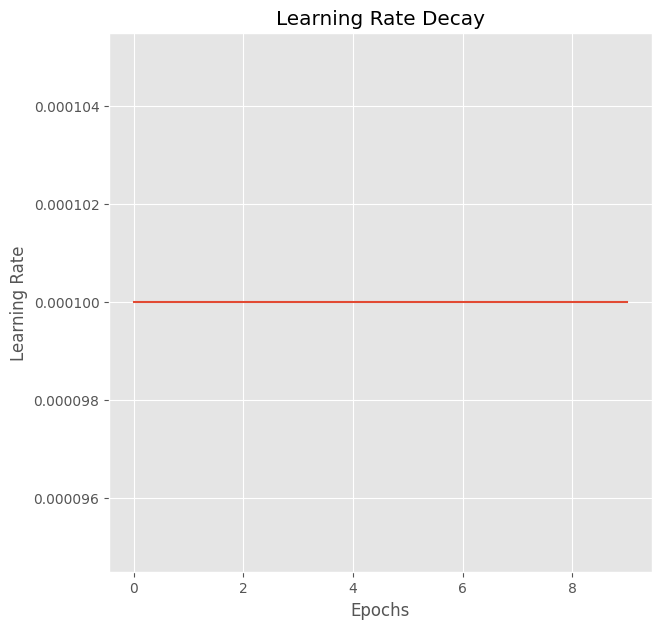

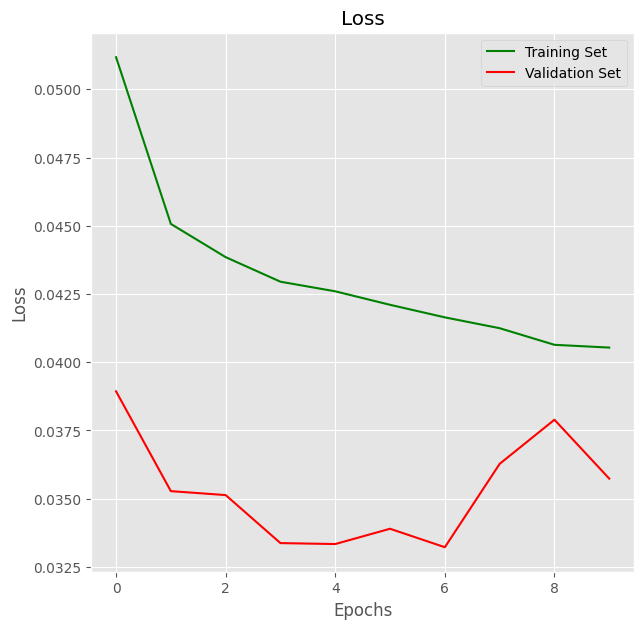

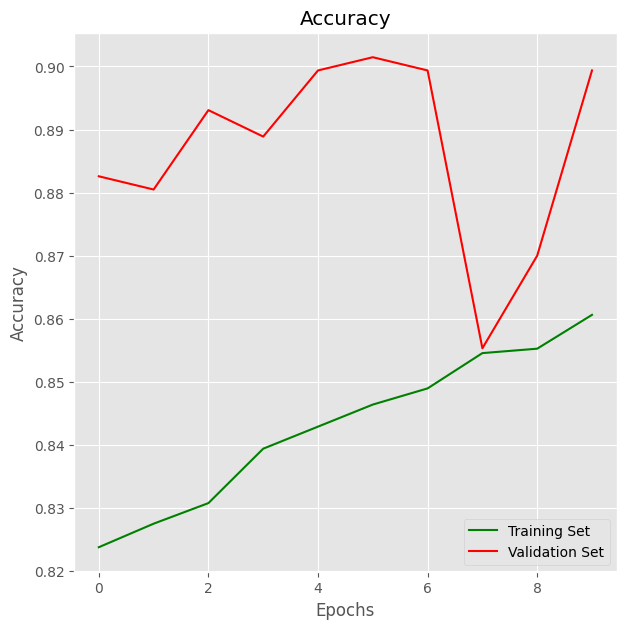

Average loss on train set: 0.04318100698292256
Average accuracy on train set: 0.8430435717105865
Average loss on test set: 0.03530675396323204
Average accuracy on test set: 0.8870021045207978
38/38 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.8557
Test Loss: 0.041147381067276
Test Accuracy: 0.8557047247886658
  1/135 [..............................] - ETA: 5s

2023-03-10 17:03:17.686604: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-6: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-6; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
6it [01:44, 17.08s/it]

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3435
           1       0.65      0.70      0.68       856

    accuracy                           0.87      4291
   macro avg       0.79      0.81      0.80      4291
weighted avg       0.87      0.87      0.87      4291

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       382
           1       0.73      0.78      0.76        95

    accuracy                           0.90       477
   macro avg       0.84      0.85      0.85       477
weighted avg       0.90      0.90      0.90       477


-------- TERMINATED FOLD: 6 --------


# **FOLD 7**

Model: "MLP-7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


135/135 [==============================] - 2s 14ms/step - loss: 0.0510 - accuracy: 0.8241 - val_loss: 0.0457 - val_accuracy: 0.8365 - lr: 1.0000e-04
Epoch 2/10
134/135 [============================>.] - ETA: 0s - loss: 0.0442 - accuracy: 0.8365
Epoch 2: val_loss improved from 0.04572 to 0.04418, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-7


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0442 - accuracy: 0.8362 - val_loss: 0.0442 - val_accuracy: 0.8323 - lr: 1.0000e-04
Epoch 3/10
133/135 [============================>.] - ETA: 0s - loss: 0.0431 - accuracy: 0.8376
Epoch 3: val_loss improved from 0.04418 to 0.04416, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-7


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0430 - accuracy: 0.8376 - val_loss: 0.0442 - val_accuracy: 0.8449 - lr: 1.0000e-04
Epoch 4/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0423 - accuracy: 0.8459
Epoch 4: val_loss improved from 0.04416 to 0.04212, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-7


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0422 - accuracy: 0.8453 - val_loss: 0.0421 - val_accuracy: 0.8386 - lr: 1.0000e-04
Epoch 5/10
133/135 [============================>.] - ETA: 0s - loss: 0.0419 - accuracy: 0.8494
Epoch 5: val_loss did not improve from 0.04212
135/135 [==============================] - 1s 9ms/step - loss: 0.0418 - accuracy: 0.8495 - val_loss: 0.0430 - val_accuracy: 0.8637 - lr: 1.0000e-04
Epoch 6/10
133/135 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.8531
Epoch 6: val_loss did not improve from 0.04212
135/135 [==============================] - 1s 9ms/step - loss: 0.0412 - accuracy: 0.8536 - val_loss: 0.0450 - val_accuracy: 0.8700 - lr: 1.0000e-04
Epoch 7/10
132/135 [============================>.] - ETA: 0s - loss: 0.0409 - accuracy: 0.8584
Epoch 7: val_loss did not improve from 0.04212
135/135 [==============================] - 1s 9ms/step - loss: 0.0409 - accuracy: 0.8581 - val_loss: 0.0442 - val_accuracy: 0.

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-7/assets


135/135 [==============================] - 2s 14ms/step - loss: 0.0401 - accuracy: 0.8637 - val_loss: 0.0415 - val_accuracy: 0.8532 - lr: 1.0000e-04
Epoch 10/10
132/135 [============================>.] - ETA: 0s - loss: 0.0397 - accuracy: 0.8665
Epoch 10: val_loss did not improve from 0.04153
135/135 [==============================] - 1s 9ms/step - loss: 0.0398 - accuracy: 0.8658 - val_loss: 0.0419 - val_accuracy: 0.8491 - lr: 1.0000e-04


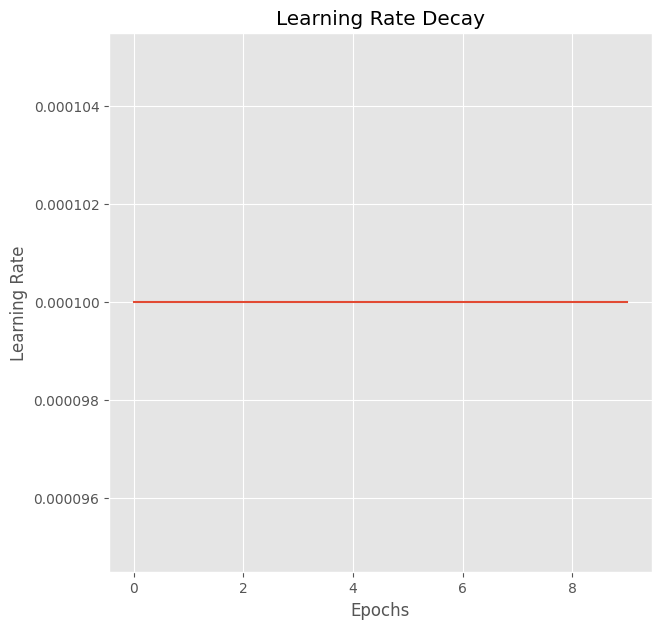

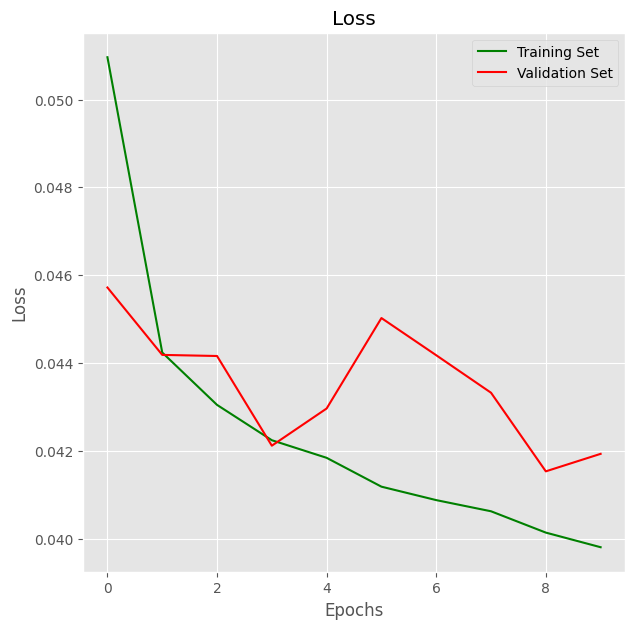

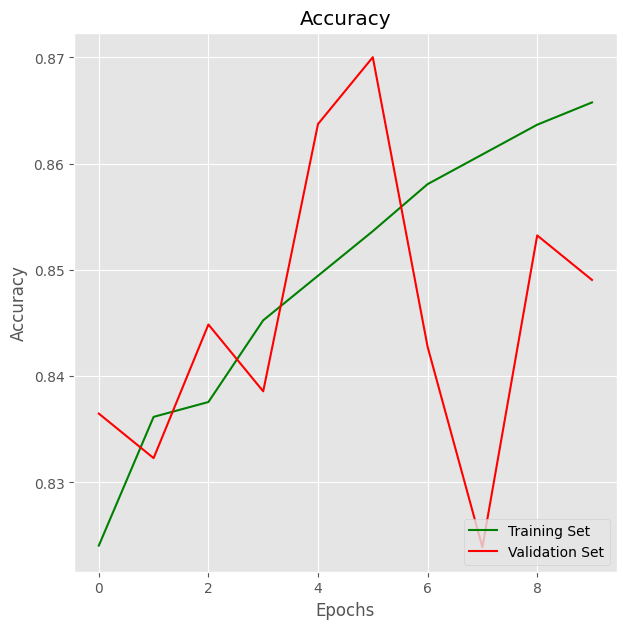

Average loss on train set: 0.04249429553747177
Average accuracy on train set: 0.8494523406028748
Average loss on test set: 0.04351179637014866
Average accuracy on test set: 0.8454926669597626
38/38 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.8582
Test Loss: 0.04049021005630493
Test Accuracy: 0.8582214713096619
  1/135 [..............................] - ETA: 5s

2023-03-10 17:03:34.908235: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-7: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-7; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
7it [02:01, 17.13s/it]

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3435
           1       0.64      0.76      0.69       856

    accuracy                           0.87      4291
   macro avg       0.79      0.83      0.80      4291
weighted avg       0.88      0.87      0.87      4291

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       382
           1       0.62      0.66      0.64        95

    accuracy                           0.85       477
   macro avg       0.77      0.78      0.78       477
weighted avg       0.86      0.85      0.85       477


-------- TERMINATED FOLD: 7 --------


# **FOLD 8**

Model: "MLP-8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-8/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-8/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0507 - accuracy: 0.8273 - val_loss: 0.0459 - val_accuracy: 0.8386 - lr: 1.0000e-04
Epoch 2/10
132/135 [============================>.] - ETA: 0s - loss: 0.0444 - accuracy: 0.8324
Epoch 2: val_loss improved from 0.04591 to 0.04372, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-8


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-8/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-8/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0442 - accuracy: 0.8334 - val_loss: 0.0437 - val_accuracy: 0.8365 - lr: 1.0000e-04
Epoch 3/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0427 - accuracy: 0.8392
Epoch 3: val_loss did not improve from 0.04372
135/135 [==============================] - 1s 9ms/step - loss: 0.0428 - accuracy: 0.8390 - val_loss: 0.0438 - val_accuracy: 0.8512 - lr: 1.0000e-04
Epoch 4/10
131/135 [============================>.] - ETA: 0s - loss: 0.0421 - accuracy: 0.8473
Epoch 4: val_loss did not improve from 0.04372
135/135 [==============================] - 1s 9ms/step - loss: 0.0420 - accuracy: 0.8457 - val_loss: 0.0443 - val_accuracy: 0.8553 - lr: 1.0000e-04
Epoch 5/10
132/135 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.8497
Epoch 5: val_loss improved from 0.04372 to 0.04230, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-8


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-8/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-8/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0416 - accuracy: 0.8499 - val_loss: 0.0423 - val_accuracy: 0.8470 - lr: 1.0000e-04
Epoch 6/10
129/135 [===========================>..] - ETA: 0s - loss: 0.0407 - accuracy: 0.8530
Epoch 6: val_loss improved from 0.04230 to 0.04197, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-8


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-8/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-8/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0410 - accuracy: 0.8527 - val_loss: 0.0420 - val_accuracy: 0.8512 - lr: 1.0000e-04
Epoch 7/10
131/135 [============================>.] - ETA: 0s - loss: 0.0407 - accuracy: 0.8533
Epoch 7: val_loss did not improve from 0.04197
135/135 [==============================] - 1s 9ms/step - loss: 0.0407 - accuracy: 0.8534 - val_loss: 0.0421 - val_accuracy: 0.8344 - lr: 1.0000e-04
Epoch 8/10
132/135 [============================>.] - ETA: 0s - loss: 0.0407 - accuracy: 0.8537
Epoch 8: val_loss did not improve from 0.04197
135/135 [==============================] - 1s 9ms/step - loss: 0.0405 - accuracy: 0.8548 - val_loss: 0.0434 - val_accuracy: 0.8532 - lr: 1.0000e-04
Epoch 9/10
133/135 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.8581
Epoch 9: val_loss did not improve from 0.04197
135/135 [==============================] - 1s 9ms/step - loss: 0.0399 - accuracy: 0.8578 - val_loss: 0.0444 - val_accuracy: 0.

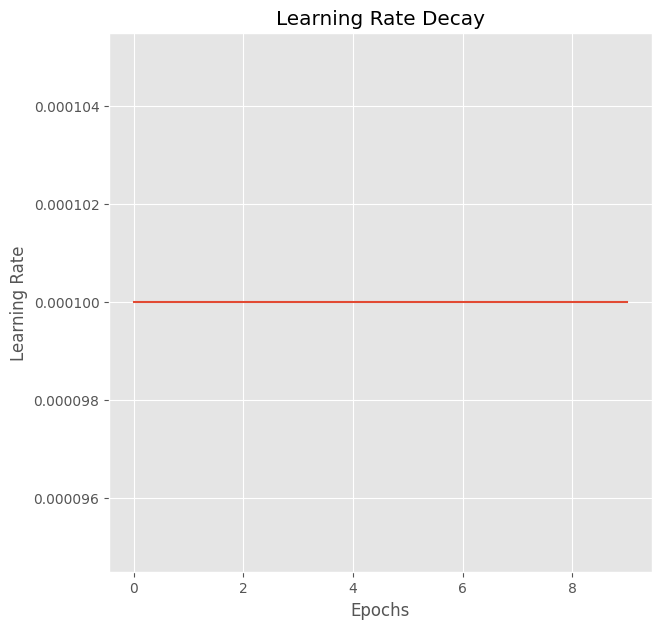

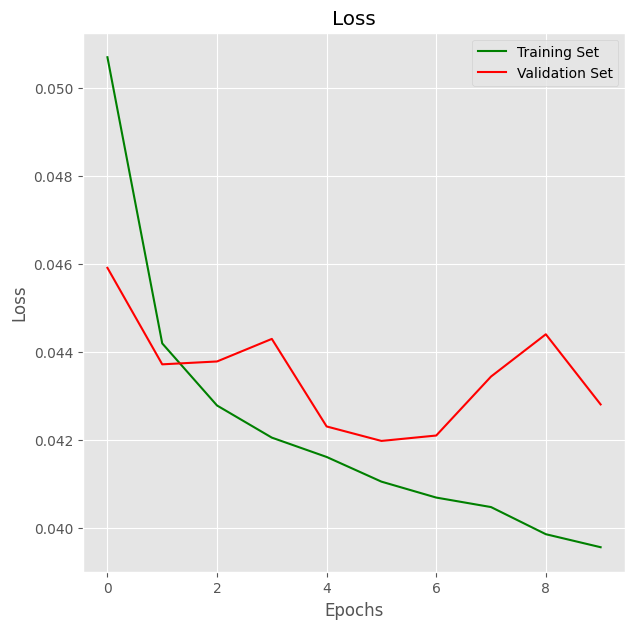

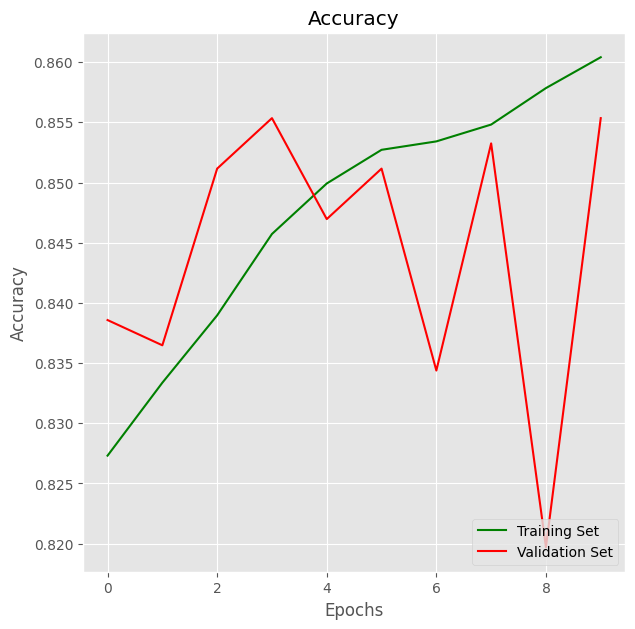

Average loss on train set: 0.042293965071439746
Average accuracy on train set: 0.8474481463432312
Average loss on test set: 0.04347181282937527
Average accuracy on test set: 0.8442348003387451
38/38 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.8532
Test Loss: 0.04090094193816185
Test Accuracy: 0.8531879186630249
  1/135 [..............................] - ETA: 5s

2023-03-10 17:03:51.311452: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-8: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-8; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
8it [02:17, 16.91s/it]

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3436
           1       0.64      0.73      0.68       855

    accuracy                           0.86      4291
   macro avg       0.78      0.81      0.80      4291
weighted avg       0.87      0.86      0.87      4291

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       381
           1       0.61      0.72      0.66        96

    accuracy                           0.85       477
   macro avg       0.77      0.80      0.78       477
weighted avg       0.86      0.85      0.86       477


-------- TERMINATED FOLD: 8 --------


# **FOLD 9**

Model: "MLP-9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-9/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-9/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0509 - accuracy: 0.8211 - val_loss: 0.0440 - val_accuracy: 0.8634 - lr: 1.0000e-04
Epoch 2/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0443 - accuracy: 0.8317
Epoch 2: val_loss improved from 0.04399 to 0.04198, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-9


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-9/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-9/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0445 - accuracy: 0.8318 - val_loss: 0.0420 - val_accuracy: 0.8803 - lr: 1.0000e-04
Epoch 3/10
132/135 [============================>.] - ETA: 0s - loss: 0.0432 - accuracy: 0.8319
Epoch 3: val_loss improved from 0.04198 to 0.04070, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-9


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-9/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-9/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0432 - accuracy: 0.8318 - val_loss: 0.0407 - val_accuracy: 0.8739 - lr: 1.0000e-04
Epoch 4/10
132/135 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.8378
Epoch 4: val_loss did not improve from 0.04070
135/135 [==============================] - 1s 9ms/step - loss: 0.0424 - accuracy: 0.8381 - val_loss: 0.0409 - val_accuracy: 0.8845 - lr: 1.0000e-04
Epoch 5/10
132/135 [============================>.] - ETA: 0s - loss: 0.0417 - accuracy: 0.8447
Epoch 5: val_loss did not improve from 0.04070
135/135 [==============================] - 1s 10ms/step - loss: 0.0417 - accuracy: 0.8444 - val_loss: 0.0436 - val_accuracy: 0.8887 - lr: 1.0000e-04
Epoch 6/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0414 - accuracy: 0.8510
Epoch 6: val_loss did not improve from 0.04070
135/135 [==============================] - 1s 10ms/step - loss: 0.0412 - accuracy: 0.8511 - val_loss: 0.0410 - val_accuracy: 

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-9/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-9/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0408 - accuracy: 0.8530 - val_loss: 0.0399 - val_accuracy: 0.8718 - lr: 1.0000e-04
Epoch 9/10
130/135 [===========================>..] - ETA: 0s - loss: 0.0398 - accuracy: 0.8594
Epoch 9: val_loss did not improve from 0.03988
135/135 [==============================] - 1s 10ms/step - loss: 0.0402 - accuracy: 0.8586 - val_loss: 0.0473 - val_accuracy: 0.7710 - lr: 1.0000e-04
Epoch 10/10
132/135 [============================>.] - ETA: 0s - loss: 0.0399 - accuracy: 0.8587
Epoch 10: val_loss did not improve from 0.03988
135/135 [==============================] - 1s 9ms/step - loss: 0.0399 - accuracy: 0.8593 - val_loss: 0.0400 - val_accuracy: 0.8782 - lr: 1.0000e-04


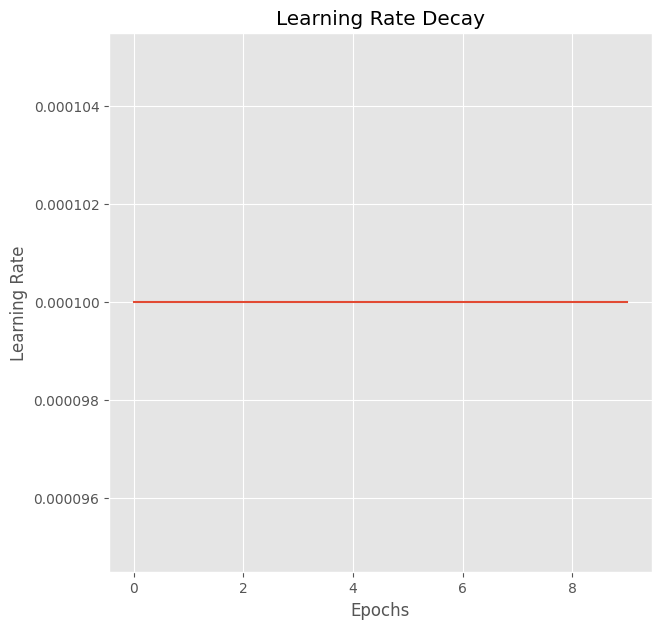

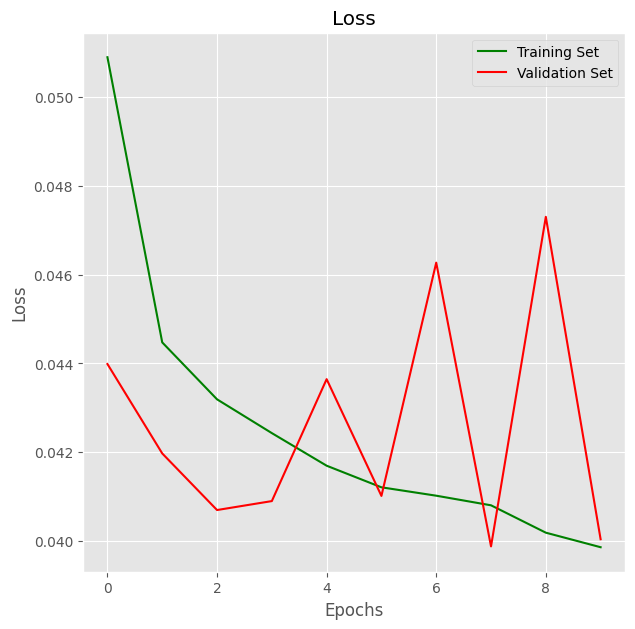

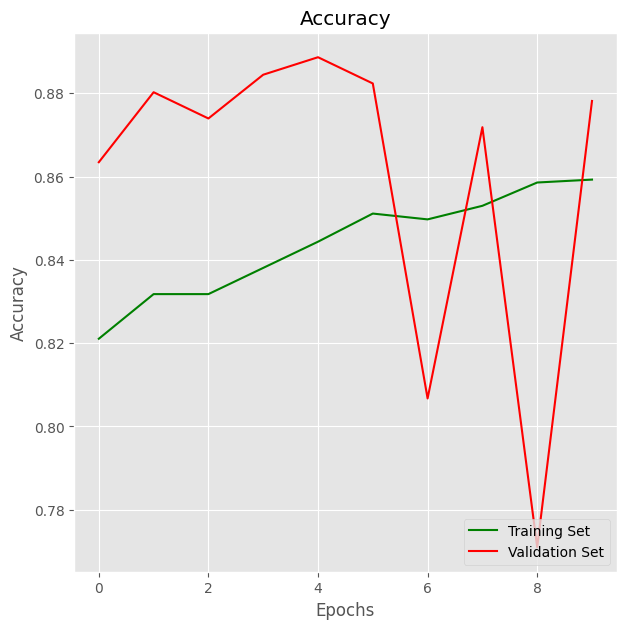

Average loss on train set: 0.0425792396068573
Average accuracy on train set: 0.8438723266124726
Average loss on test set: 0.04257296808063984
Average accuracy on test set: 0.8600840449333191
38/38 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.8574
Test Loss: 0.040575288236141205
Test Accuracy: 0.8573825359344482
  1/135 [..............................] - ETA: 5s

2023-03-10 17:04:07.949364: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-9: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-9; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
9it [02:34, 16.83s/it]

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3436
           1       0.62      0.75      0.68       856

    accuracy                           0.86      4292
   macro avg       0.78      0.82      0.79      4292
weighted avg       0.87      0.86      0.86      4292

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       381
           1       0.65      0.79      0.71        95

    accuracy                           0.87       476
   macro avg       0.80      0.84      0.81       476
weighted avg       0.88      0.87      0.88       476


-------- TERMINATED FOLD: 9 --------


# **FOLD 10**

Model: "MLP-10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               13132

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0505 - accuracy: 0.8229 - val_loss: 0.0465 - val_accuracy: 0.8424 - lr: 1.0000e-04
Epoch 2/10
133/135 [============================>.] - ETA: 0s - loss: 0.0442 - accuracy: 0.8365
Epoch 2: val_loss improved from 0.04653 to 0.04449, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-10


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0441 - accuracy: 0.8362 - val_loss: 0.0445 - val_accuracy: 0.8424 - lr: 1.0000e-04
Epoch 3/10
131/135 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.8349
Epoch 3: val_loss improved from 0.04449 to 0.04417, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-10


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0426 - accuracy: 0.8346 - val_loss: 0.0442 - val_accuracy: 0.8529 - lr: 1.0000e-04
Epoch 4/10
132/135 [============================>.] - ETA: 0s - loss: 0.0421 - accuracy: 0.8430
Epoch 4: val_loss did not improve from 0.04417
135/135 [==============================] - 1s 9ms/step - loss: 0.0422 - accuracy: 0.8427 - val_loss: 0.0493 - val_accuracy: 0.7794 - lr: 1.0000e-04
Epoch 5/10
132/135 [============================>.] - ETA: 0s - loss: 0.0417 - accuracy: 0.8485
Epoch 5: val_loss improved from 0.04417 to 0.04324, saving model to ../../../models/MLP/2023-03-10_17-01-34/fold-10


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0418 - accuracy: 0.8483 - val_loss: 0.0432 - val_accuracy: 0.8487 - lr: 1.0000e-04
Epoch 6/10
131/135 [============================>.] - ETA: 0s - loss: 0.0412 - accuracy: 0.8488
Epoch 6: val_loss did not improve from 0.04324
135/135 [==============================] - 1s 9ms/step - loss: 0.0411 - accuracy: 0.8490 - val_loss: 0.0454 - val_accuracy: 0.8718 - lr: 1.0000e-04
Epoch 7/10
131/135 [============================>.] - ETA: 0s - loss: 0.0409 - accuracy: 0.8521
Epoch 7: val_loss did not improve from 0.04324
135/135 [==============================] - 1s 9ms/step - loss: 0.0408 - accuracy: 0.8525 - val_loss: 0.0437 - val_accuracy: 0.8592 - lr: 1.0000e-04
Epoch 8/10
132/135 [============================>.] - ETA: 0s - loss: 0.0403 - accuracy: 0.8570
Epoch 8: val_loss did not improve from 0.04324
135/135 [==============================] - 1s 9ms/step - loss: 0.0402 - accuracy: 0.8569 - val_loss: 0.0433 - val_accuracy: 0.

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-10_17-01-34/fold-10/assets


135/135 [==============================] - 2s 13ms/step - loss: 0.0397 - accuracy: 0.8632 - val_loss: 0.0432 - val_accuracy: 0.8592 - lr: 1.0000e-04


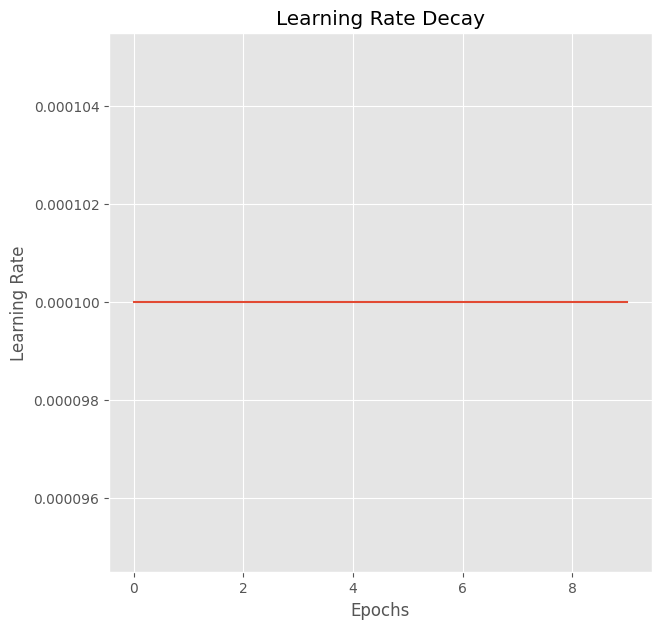

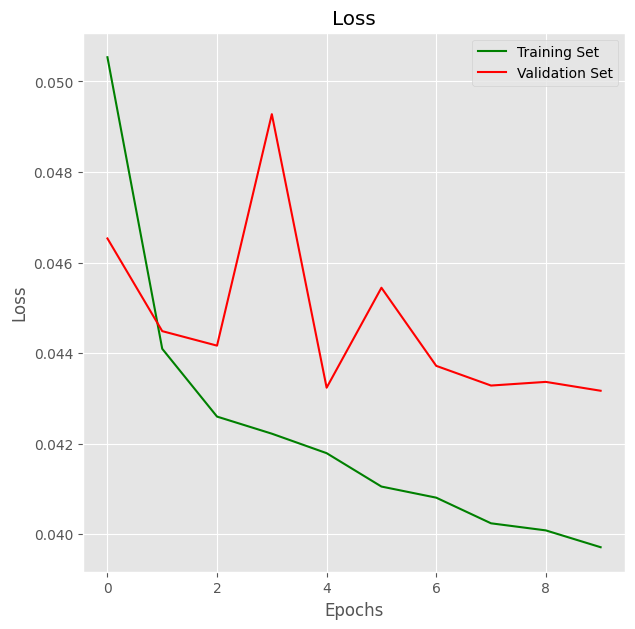

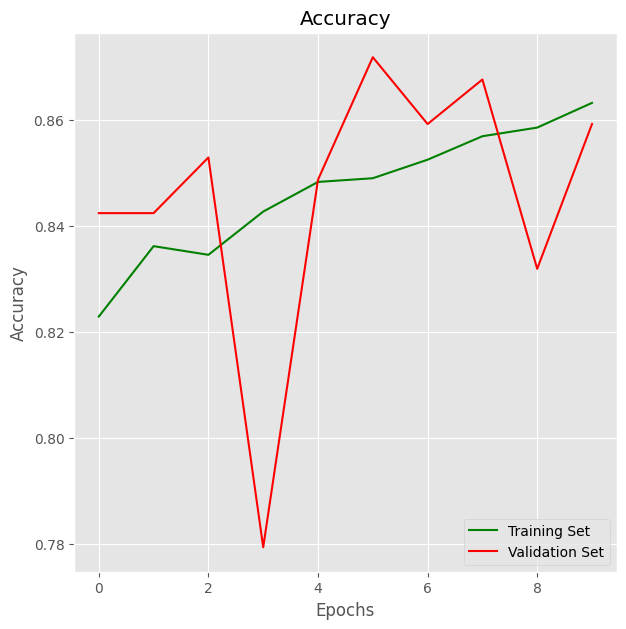

Average loss on train set: 0.04231589958071709
Average accuracy on train set: 0.8465051233768464
Average loss on test set: 0.04466913975775242
Average accuracy on test set: 0.8455882370471954
38/38 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.8565
Test Loss: 0.041177548468112946
Test Accuracy: 0.8565436005592346
  1/135 [..............................] - ETA: 5s

2023-03-10 17:04:25.023607: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-10_17-01-34/fold-10: FAILED_PRECONDITION: ../../../models/MLP/2023-03-10_17-01-34/fold-10; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 1ms/step


/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
10it [02:51, 17.14s/it]

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3436
           1       0.66      0.74      0.70       856

    accuracy                           0.87      4292
   macro avg       0.80      0.82      0.81      4292
weighted avg       0.88      0.87      0.88      4292

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       381
           1       0.64      0.68      0.66        95

    accuracy                           0.86       476
   macro avg       0.78      0.79      0.79       476
weighted avg       0.86      0.86      0.86       476


-------- TERMINATED FOLD: 10 --------


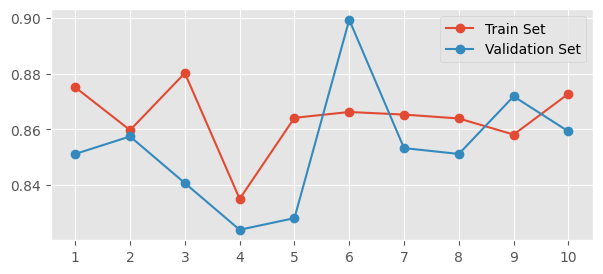

Average Train Set Accuracy: 0.8640472874694061
Average Validation Set Accuracy: 0.8536123883515669


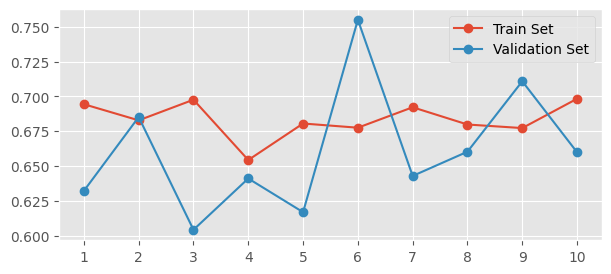

Average Train Set F1 Score: 0.6834915140748868
Average Validation Set F1 Score: 0.6608369491219832


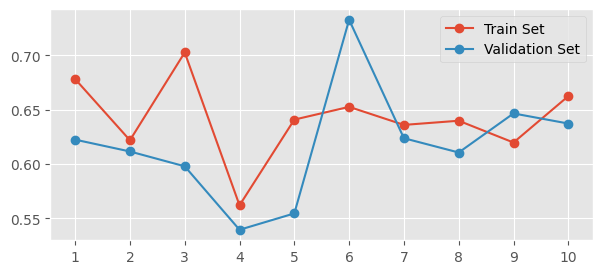

Average Train Set Precision: 0.6416309283699085
Average Validation Set Precision: 0.6177009304608474


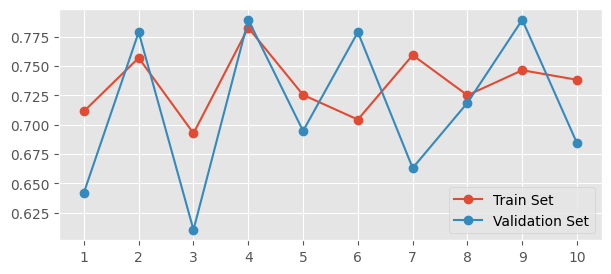

Average Train Set Recall: 0.7343136853036016
Average Validation Set Recall: 0.7150328947368421


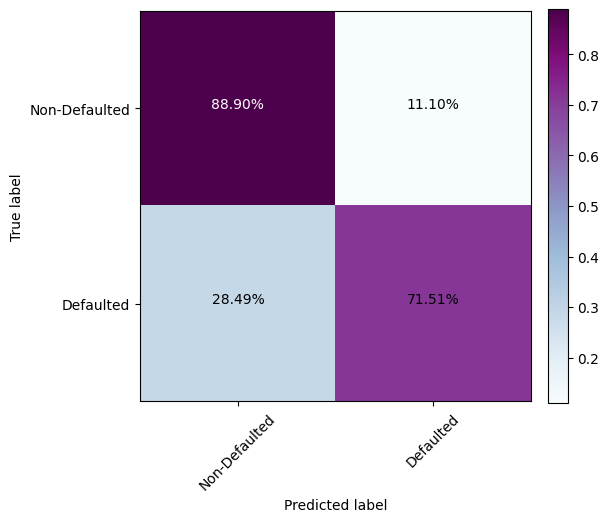

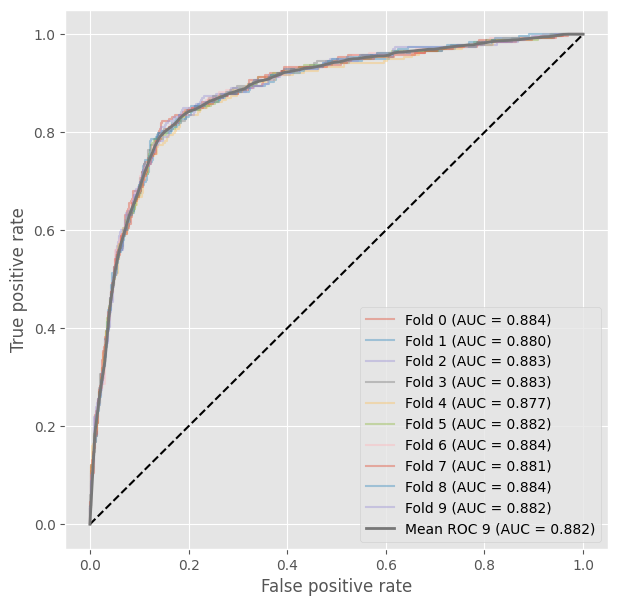

Gini derived from mean AUC 0.7633986928104575


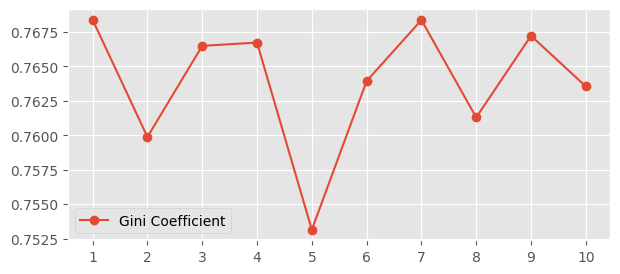

Average Gini Coefficient: 0.7639016612934482


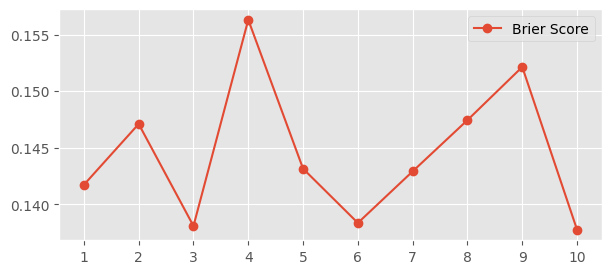

Average Brier Score: 0.14449765732570558


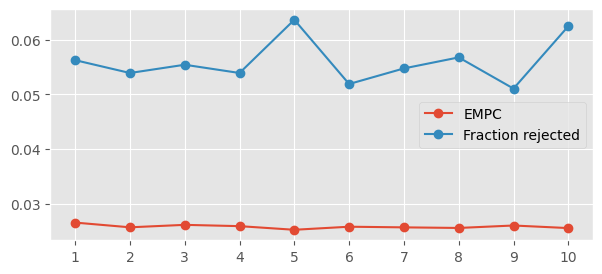

Average EMP: 0.025870276299491013
Average EMP Fractions: 0.055982908990586


In [2]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

layers = [
    tensorflow.input_layer((11,), dtype='float64'),
    tensorflow.dense_layer(256, activation='relu'),
    tensorflow.dense_layer(512, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(512, activation='relu'),
    tensorflow.dense_layer(256, activation='relu'),
    tensorflow.dense_layer(1, activation='sigmoid')
]

evaluation.k_fold_cross_validate(clf=None, layers=layers, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=10, features_scores=features_scores,
                                 features=11, model_name='MLP', learning_rate=0.0001,
                                 epochs=10, batch_size=32, verbose=True)